# Affinity Propagation
**Blake Masbruch, Alex Ruchti**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from afP import AffinityPropagation
from sklearn import preprocessing

## Data
Goal: Identify distinct spend groups for targeted advertising

In [2]:
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
df_mall_customers = pd.read_csv('./Mall_Customers.csv')
df_mall_customers['Gender'] = df_mall_customers['Gender'].map(lambda x: 1 if x == 'Female' else 0)
df_mall_customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


### Parameters

In [3]:
#SkLearn implementation with modifications for enhanced understandability
AP1 = AffinityPropagation(preference=-25.0, damping=.7, max_iter=150, convergence_iter=15)

`preference`: The diagonal of the similarity matrix. Recall:
<img src="./sim.png"
     alt="Markdown Monster icon"
     style="  display: block;margin-left: auto;margin-right: auto;width: 50%;" 
/>
This can be an array or a float that will be repeated along the diagonal. Rows with higher perference will be more likely to be chosen as exemplars. The lower this value, the fewer the clusters.<br/><br/><br/>
`damping`: Not shown in the base formulas in the model. A parameter that serves to slow the update of the the matrices to help the model converge. 

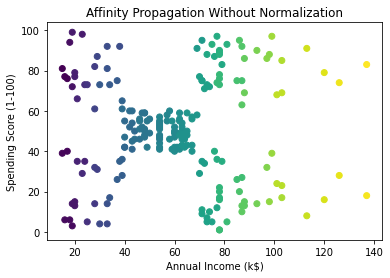

In [4]:
feature_names = ['Annual Income (k$)', 'Spending Score (1-100)']
clustering_unnorm = AP1.fit(df_mall_customers[feature_names])
plt.scatter(df_mall_customers['Annual Income (k$)'], df_mall_customers['Spending Score (1-100)'], c=clustering_unnorm.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Affinity Propagation Without Normalization')
plt.show()

In [5]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
features = min_max_scaler.fit_transform(df_mall_customers[feature_names].values)
features_df = pd.DataFrame(features)
features_df.columns = feature_names
features_df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### Model 2 Normalized Data

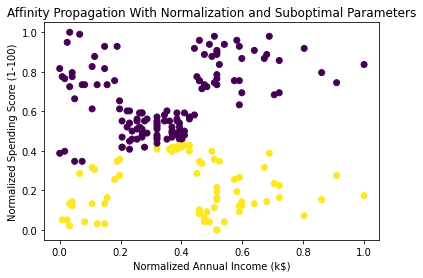

In [6]:
AP2 = AffinityPropagation(preference=-10.0, damping=.7, max_iter=200, convergence_iter=15)

clustering_norm2 = AP2.fit(features_df)
plt.scatter(features_df['Annual Income (k$)'].values, features_df['Spending Score (1-100)'].values, c=clustering_norm2.labels_)
plt.xlabel('Normalized Annual Income (k$)')
plt.ylabel('Normalized Spending Score (1-100)')
plt.title('Affinity Propagation With Normalization and Suboptimal Parameters')
plt.show()

### Model 3 Normalized and Optimized

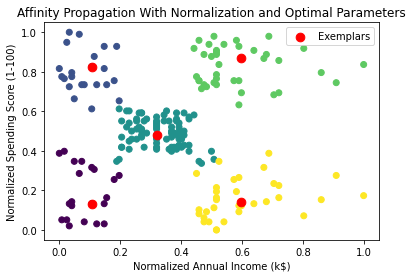

In [7]:
AP3 = AffinityPropagation(preference=-2.5, damping=.7, max_iter=200, convergence_iter=15)

clustering_norm3 = AP3.fit(features_df)
plt.scatter(features_df['Annual Income (k$)'].values, features_df['Spending Score (1-100)'].values, c=clustering_norm3.labels_)
exemplars = features_df.values[AP3.cluster_centers_indices_]
plt.scatter(exemplars[:,0], exemplars[:,1], s=75, c='red', label='Exemplars')
plt.xlabel('Normalized Annual Income (k$)')
plt.ylabel('Normalized Spending Score (1-100)')
plt.title('Affinity Propagation With Normalization and Optimal Parameters')
plt.legend()
plt.show()

### Evaluation Metrics

Evaluation of unsupervised clustering is difficult. In general, the quality of a model's outputs can be described as how represenative the exemplar is of its points. 
The following paper shows several intersting evaluation methods for unsupervised clustering <br/>
```Evaluation Metrics for Unsupervised Learning Algorithms by Julio-Omar and Palacio-Nino```

In this example we used average SSE (average sum of squared errors) of each group

In [8]:
def average_SSE(points, clusters, exemplar_indicies): 
    unique_labels = np.unique(clusters)
    total_square_error = 0
    for i in range(len(unique_labels)):
        exemplar = points[exemplar_indicies[i]]
        for group_point in points[clusters == i]:
            total_square_error += ((group_point[0] - exemplar[0])**2 + (group_point[1] - exemplar[1])**2)
            
    return total_square_error / len(unique_labels) 

In [9]:
avg_er2 = average_SSE(features_df.values, clustering_norm2.labels_, AP2.cluster_centers_indices_)
avg_er3 = average_SSE(features_df.values, clustering_norm3.labels_, AP3.cluster_centers_indices_)
print('Model 2 error: {0}'.format(avg_er2))
print('Model 3 error: {0}'.format(avg_er3))

Model 2 error: 7.493592906341877
Model 3 error: 0.7574497144151054
